# フーリエ変換

## フーリエ級数展開
基本周期$T$の周期信号$f_{(t)}$を周波数の異なる正弦波の和に分解する。
$$f_{(t)} = c_0+\sum_{k=1}^{\infty}(a_k\sin{k\omega_0t}+b_k\cos{k\omega_ot})$$

直流成分 : $c_0=\frac{1}{T}\int_{\frac{-T}{2}}^{\frac{T}{2}} f_{(t)}dt$    
$\sin$成分 : $a_k=\frac{2}{T}\int_{\frac{-T}{2}}^{\frac{T}{2}} f_{(t)}\sin{k\omega_0t}dt$    
$\cos$成分 : $c_0=\frac{2}{T}\int_{\frac{-T}{2}}^{\frac{T}{2}} f_{(t)}\cos{k\omega_0t}dt$

### 基本波成分
$a_1\sin{\omega_0t}+b_1\cos{\omega_0t}$
### 第k次高調波成分
$a_k\sin{\omega_0t}+b_k\cos{\omega_0t}$

## 複素フーリエ級数展開
$$f_{(x)} = \sum_{k=-\infty}^{\infty}c_ke^{jk\omega_0t}$$

## 例題1
### 矩形波のフーリエ級数展開

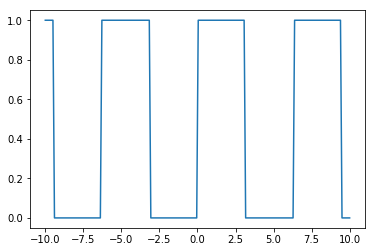

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
plt.figure()
a = np.linspace(-10,10,200)
b = np.sin(a)
square_wave = (signal.square(b) + 1)/2
plt.plot(a,square_wave)
plt.show()

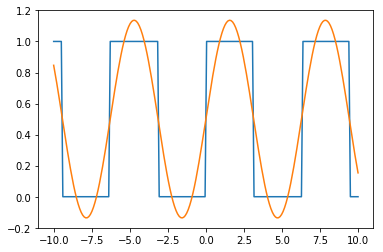

In [2]:
plt.figure()
c0 = 1/2
c1 = (2/np.pi)*np.sin(a)
plt.plot(a,square_wave)
plt.plot(a,c0+c1)
plt.show()

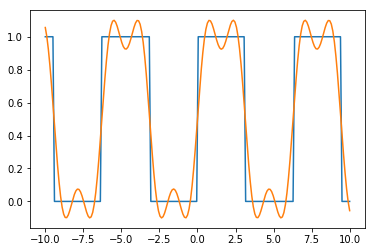

In [3]:
plt.figure()
c0 = 1/2
c1 = (2/np.pi)*np.sin(a)
c2 = (2/(3*np.pi))*np.sin(3*a)
plt.plot(a,square_wave)
plt.plot(a,c0+c1+c2)
plt.show()

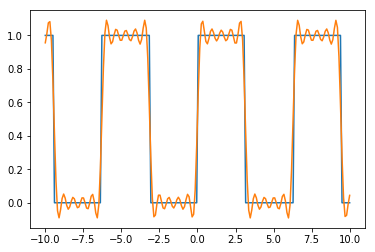

In [4]:
plt.figure()
c0 = 1/2
c_sum = c0
for k in list(range(10))[1::2]:
    c_k = (2/(k*np.pi))*np.sin(k*a)
    c_sum += c_k
plt.plot(a,square_wave)
plt.plot(a,c_sum)
plt.show()

In [10]:
from scipy import arange, sin, pi
from scipy.fftpack import fft

# 周波数F[Hz]、振幅A、サンプリング周波数fs のsin波を作る関数
def make_sin(F, A, fs, theta=0, sec=1):
    ret = A*sin(2.*pi*F*arange(int(fs*sec))/fs+theta)
    return ret

# sin波をフーリエ変換し、周波数スペクトルを求める。
# sin波形と周波数スペクトルを出力
def plot_sin(sin_wave):
    spect = abs(fft(sin_wave)) # 複素数で帰ってきたものの大きさ
    spect *= 2*np.pi/len(sin_wave)
    
    fig = plt.figure()
    fig.add_subplot(211)
    plt.plot(sin_wave)
    plt.xlim([0,len(sin_wave)])
    
    fig.add_subplot(212)
    plt.plot(spect)
    plt.xlim([0,len(spect)/5])
    plt.show()
    
    for i, j in enumerate(spect[0:int(len(spect)/5)]):
        if float(j) > 0.01:
            print(i,'[Hz] :', j)

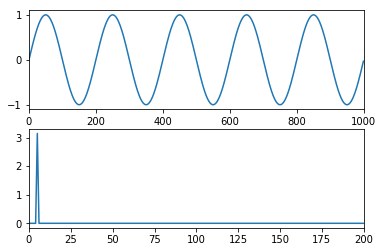

5 [Hz] : 3.14159265359


In [11]:
r1=make_sin(5,1,1000) # 周波数5Hz、振幅1、サンプリング周波数1000
plot_sin(r1)

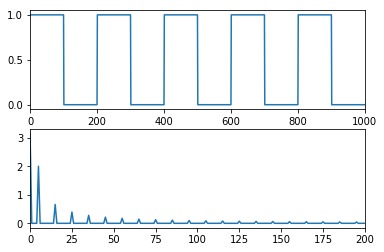

0 [Hz] : 3.1478758389
5 [Hz] : 1.99999342431
15 [Hz] : 0.666647036793
25 [Hz] : 0.399967607843
35 [Hz] : 0.285669618883
45 [Hz] : 0.222165965689
55 [Hz] : 0.181751220243
65 [Hz] : 0.153769574573
75 [Hz] : 0.133248430066
85 [Hz] : 0.117555335979
95 [Hz] : 0.105166335649
105 [Hz] : 0.0951381152701
115 [Hz] : 0.0868555536751
125 [Hz] : 0.079900448571
135 [Hz] : 0.0739785869914
145 [Hz] : 0.0688769937947
155 [Hz] : 0.064437729417
165 [Hz] : 0.0605412159803
175 [Hz] : 0.0570952804159
185 [Hz] : 0.0540277514025
195 [Hz] : 0.0512813343875


In [12]:
square_wave2 = (signal.square(r1) + 1) / 2
plot_sin(square_wave2)

# 振幅変調(AM)

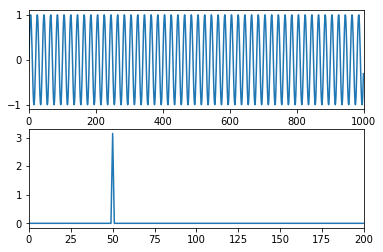

50 [Hz] : 3.14159265359


In [13]:
r2=make_sin(50,1,1000) # 周波数100Hz、振幅1、サンプリング周波数1000
plot_sin(r2)

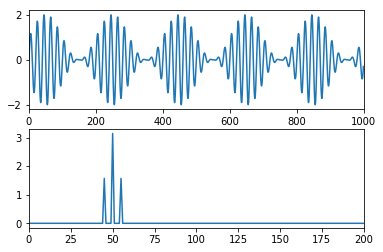

45 [Hz] : 1.57079632679
50 [Hz] : 3.14159265359
55 [Hz] : 1.57079632679


In [14]:
AM = (1+r1)*r2
plot_sin(AM)